<a href="https://colab.research.google.com/github/ralphbacor-creator/Bacor-simu./blob/main/Bacor_act_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

N=10000 M=7809 Pi=3.1236


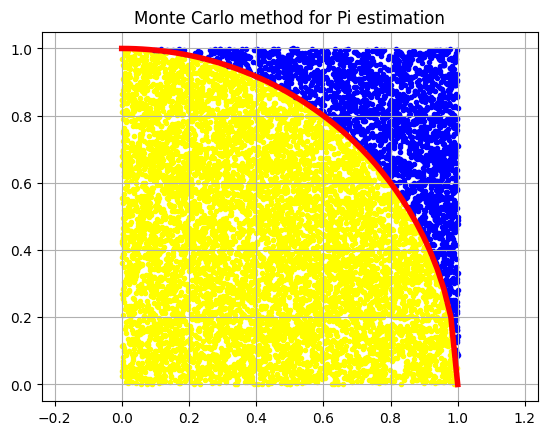

In [ ]:
1. Estimating pi using monte carlo.

import math
import random
import numpy as np
import matplotlib.pyplot as plt

N = 1000000 # Set N back to 1,000,000
M = 0
XCircle=[]
YCircle=[]
XSquare=[]
YSquare=[]

for p in range(N):
    x=random.random()
    y=random.random()
    # Corrected: if statement on a new line and indented
    if (x**2 + y**2 <= 1):
        M+=1
        XCircle.append(x)
        YCircle.append(y)
    else:
        # Corrected: typo 'appe' to 'append', and added 'x' for XSquare
        XSquare.append(x)
        YSquare.append(y)

Pi = 4*M/N
print("N=%d M=%d Pi=%.4f" %(N,M,Pi)) # Changed to %.4f for more precision

# Corrected: Removed extraneous output from print statement
XLin = np.linspace(0,1)
YLin = []
for x in XLin:
    # Corrected: Removed plt.grid from this line, assuming it was a typo/merge
    YLin.append(math.sqrt(1-x**2))

# Corrected: Removed unicode spaces from plt.axis and plt.grid
plt.axis("equal")
# Corrected: Combined/fixed the duplicated and malformed grid calls
plt.grid(which="major")
plt.plot(XLin , YLin, color="red" , linewidth="4")
plt.scatter(XCircle, YCircle, color="yellow",
            marker=".")
# Corrected: Removed unicode spaces and fixed typo 'markerl' to 'marker'
plt.scatter(XSquare, YSquare, color="blue",
            marker=".")
plt.title("Monte Carlo method for Pi estimation")
plt.show()

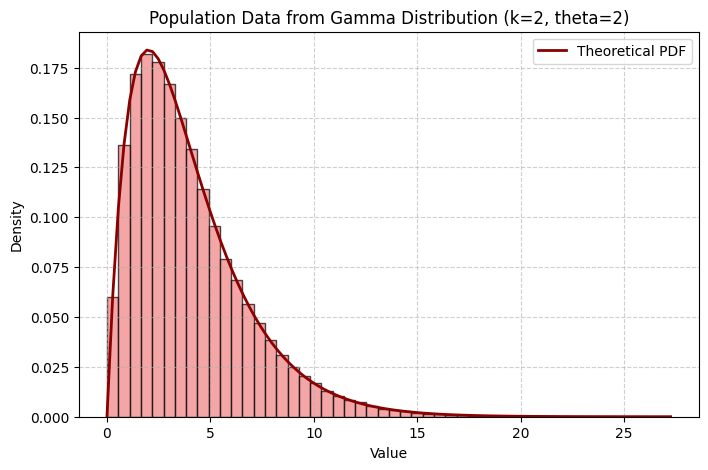


Generated Gamma Population Data (k=2, theta=2):
  Mean: 4.0043
  Standard Deviation: 2.8273


In [ ]:
2.Using monte carlo in Central limit theorem.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define parameters for the Gamma population distribution
k = 2     # Shape parameter (e.g., k=1 for exponential, k>1 for more symmetric shapes)
theta = 2 # Scale parameter (controls the spread)
num_data_points = 100000 # Number of data points to generate

# Generate population data from a Gamma distribution
population_data = np.random.gamma(k, theta, num_data_points)

# Plot the histogram of the generated population data
plt.figure(figsize=(8, 5))
plt.hist(population_data, bins=50, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title(f'Population Data from Gamma Distribution (k={k}, theta={theta})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)

# Overlay the theoretical Gamma PDF for comparison
x_gamma = np.linspace(0, max(population_data), 100)
plt.plot(x_gamma, gamma.pdf(x_gamma, a=k, scale=theta), color='darkred', linewidth=2, label='Theoretical PDF')
plt.legend()
plt.show()

print(f"\nGenerated Gamma Population Data (k={k}, theta={theta}):")
print(f"  Mean: {np.mean(population_data):.4f}")
print(f"  Standard Deviation: {np.std(population_data):.4f}")

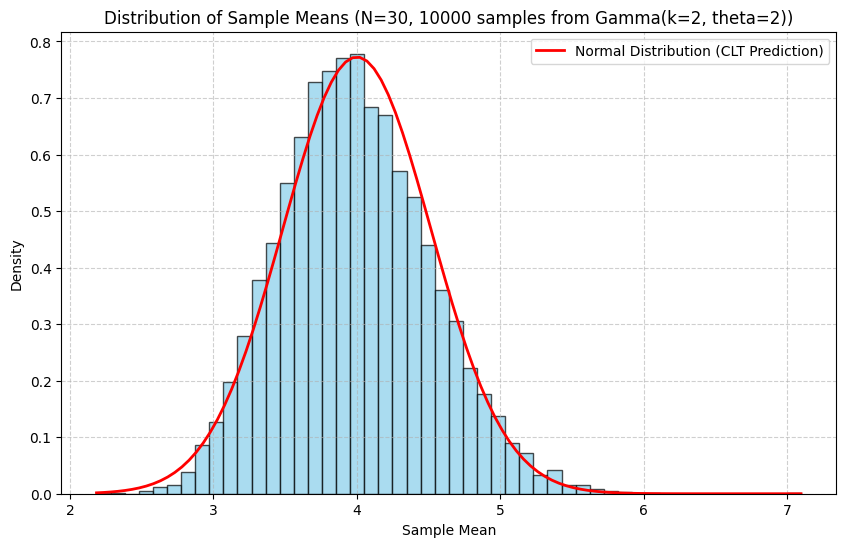

Observed Mean of Sample Means: 3.9887
Expected Mean of Sample Means (Population Mean): 4.0000
Observed Std Dev of Sample Means: 0.5199
Expected Std Dev of Sample Means (Population Std / sqrt(N)): 0.5164


In [ ]:
3.Use Gamma Distribution in no.2

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma # Added gamma import

# Parameters for the simulation
num_samples = 10000  # Number of sample means to generate
sample_size = 30     # Size of each individual sample (N in CLT)

# 1. Define the original non-normal distribution (e.g., Gamma Distribution)
# Let's use a Gamma distribution with specific shape and scale
k = 2     # Shape parameter
theta = 2 # Scale parameter

# Array to store the means of each sample
sample_means = []

for _ in range(num_samples):
    # Draw a sample of 'sample_size' from the Gamma distribution
    sample = np.random.gamma(k, theta, sample_size) # Changed to np.random.gamma
    # Calculate the mean of this sample
    sample_means.append(np.mean(sample))

# Convert the list to a NumPy array for easier plotting
sample_means = np.array(sample_means)

# 2. Plot the distribution of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f'Distribution of Sample Means (N={sample_size}, {num_samples} samples from Gamma(k={k}, theta={theta}))') # Updated title
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)

# Overlay a normal distribution for comparison (optional but illustrative)
mu = k * theta # Expected mean of sample means (same as population mean for Gamma)
sigma = np.sqrt((k * (theta**2)) / sample_size) # Expected standard deviation of sample means (sqrt(population variance / N))
x = np.linspace(min(sample_means), max(sample_means), 100)
plt.plot(x, norm.pdf(x, mu, sigma), color='red', linewidth=2, label='Normal Distribution (CLT Prediction)')
plt.legend()
plt.show()

print(f"Observed Mean of Sample Means: {np.mean(sample_means):.4f}")
print(f"Expected Mean of Sample Means (Population Mean): {mu:.4f}")
print(f"Observed Std Dev of Sample Means: {np.std(sample_means):.4f}")
print(f"Expected Std Dev of Sample Means (Population Std / sqrt(N)): {sigma:.4f}")